# Book Values vs. Market Values

### Introduction

Now I would like to analyze the book values against the market values of the selected Canadian oil and gas company stocks. The book value of a company is the value of a company according to it's balance sheet and financial fundamentals, vs. the market value which is the value that the general market assigns to a stock. This is valuable as it will serve as a strong indicator to whether fundamental company financials set the market rate of a companies stock within the oil and gas industry, or if other non-financial factors such as news and future prospects are involved as well.

In [52]:
# importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
# suppresses scientific notation for pandas dataframes (4 decimal places maximum)
pd.options.display.float_format = '{:.4f}'.format

### Data Gathering

In [53]:
# importing the balance sheets dataset
data = pd.read_csv("balance_sheet_stock_prices.csv")
data.head()

,Unnamed: 0,date,symbol,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,...,othertotalStockholdersEquity,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,ClosingStockPrice
0,0,2022-12-30,SU,1980000000.0000,0.0000,1980000000.0000,6312000000.0000,5058000000.0000,1186000000.0000,14536000000.0000,...,571000000.0000,39367000000.0000,39367000000.0000,84618000000.0000,0.0000,84618000000.0000,758000000.0000,15619000000.0000,13639000000.0000,30.2341
1,1,2021-12-31,SU,2205000000.0000,0.0000,2205000000.0000,4662000000.0000,4110000000.0000,0.0000,10977000000.0000,...,612000000.0000,36614000000.0000,36614000000.0000,83739000000.0000,0.0000,83739000000.0000,391000000.0000,18354000000.0000,16149000000.0000,22.8518
2,2,2020-12-31,SU,1885000000.0000,0.0000,1885000000.0000,3884000000.0000,3617000000.0000,0.0000,9386000000.0000,...,591000000.0000,35757000000.0000,35757000000.0000,84616000000.0000,0.0000,84616000000.0000,323000000.0000,21699000000.0000,19814000000.0000,14.7492
3,3,2019-12-31,SU,1960000000.0000,0.0000,1960000000.0000,4185000000.0000,3761000000.0000,0.0000,9906000000.0000,...,566000000.0000,42042000000.0000,42042000000.0000,89435000000.0000,0.0000,89435000000.0000,289000000.0000,17970000000.0000,16010000000.0000,27.6565
4,4,2018-12-31,SU,2221000000.0000,0.0000,2221000000.0000,3320000000.0000,3159000000.0000,0.0000,8700000000.0000,...,540000000.0000,44005000000.0000,44005000000.0000,89579000000.0000,0.0000,89579000000.0000,237000000.0000,17350000000.0000,15129000000.0000,22.6501


In [55]:
# opening the api key text document and extracting the api key as a string variable
with open("api_key.txt") as api_doc:
    api_key = api_doc.read()

def get_market_cap(ticker):
    """
    returns the market capitalization values of a given stock ticker in a list of jsons
    """
    # extracting the market capitalization information from the fmp api in a json format from 2018-01-01
    market_cap = requests.get(f"https://financialmodelingprep.com/api/v3/historical-market-capitalization/{ticker}?limit=10000&from=2018-12-01&to=2023-01-01&apikey={api_key}")
    market_cap = market_cap.json()

    return market_cap

In [54]:
# storing the unique dates in the balance sheets dataset
unique_dates = data["date"].unique()

In [56]:
# creating a list of relevant canadian oil and gas stock tickers
tickers = ["SU", "CVE", "CNQ", "TRP", "IMO", "ENB", "PPL", "KEY", "XOM", "CVX", "SHEL", "TTE", "COP", "BP", "MPC", "OXY", "PXD", "KMI", "WMB", "LNG", "MPLX", "SLB", "EOG", "SUN", "VLO", "OVV"]

# initializing an empty list to store each ticker of market capitalization values
merged = []

# looping through each ticker
for ticker in tickers:
    # calling the get_market_cap function in order to receive the data as a json
    current_ticker_market_caps = get_market_cap(ticker)
    # converting the json file to a pandas dataframe for faster filteration and computing
    current_ticker_market_caps_df = pd.DataFrame(current_ticker_market_caps)
    # filtering for only dates present in the unique dates
    current_ticker_market_caps_df[current_ticker_market_caps_df["date"].isin(unique_dates)]
    # appending the dataframe to the merged list
    merged.append(current_ticker_market_caps_df)

# combining all of the ticker dataframes into a single market capitalization dataframe
market_cap_df = pd.concat(merged)

### Calculating the Book Value Per Share

$$
Book Value Per Share = \frac{Total Shareholders Equity - Preferred Shares}{Outstanding Shares}
$$

(Wall Street Prep, 2023)

In [57]:
# merging the market_cap dataframe with the main dataframe
data = pd.merge(data, market_cap_df, on = ["date", "symbol"], how = "left")
# making a column for the number of shares outstanding
data["outstandingShares"] = data["marketCap"]/data["ClosingStockPrice"]
# calculating the book value per share
data["bookValuePerShare"] = (data["totalStockholdersEquity"] - data["preferredStock"])/data["outstandingShares"]

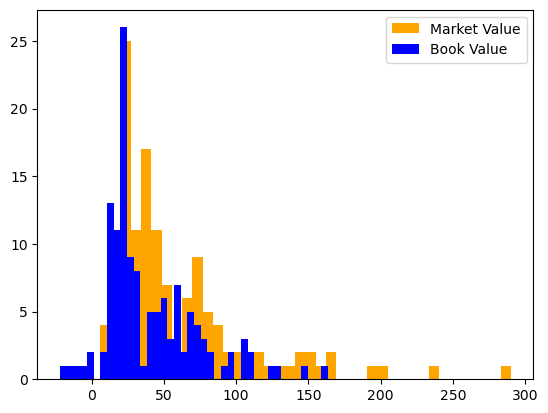

In [82]:
# plotting histograms of book and market values per share
plt.hist(data["ClosingStockPrice"], bins = 40, color = "orange")
plt.hist(data["bookValuePerShare"], bins = 40, color = "blue")
plt.legend(["Market Value", "Book Value"])
plt.show()

### Conclusion

It appears that the market values of Canadian oil and gas companies, are generally slightly higher than the book values from this histogram plot, while approximately still following the same right-skewed distribution. This tells us there are other factors that investors generally take into account when pricing Canadian oil and gas companies at the market value, such as future prospects and qualitative data, thus showing it is imperative that potential investors take into account, qualitative variables of Canadian oil and gas companies before investing. This plot also shows us that, in general, from these data, we can infer the market is generally optimistic of the future of Canadian oil and gas companies as this optimism has been prices into the market value, without the backing of fundamental company financials.

### References

Wall Street Prep (2023), Book value per share (BVPS), https://www.wallstreetprep.com/knowledge/book-value-of-equity-per-share/

Financial Modelling Prep (2024), Free stock market API and financial statements API, https://site.financialmodelingprep.com/developer/docs